In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
train_or = data.iloc[:900,:]
test = data.iloc[900:,:]

## Data rescaling

In [7]:
train = (train_or - train_or.mean()) / train_or.std()
test = (test - test.mean()) / test.std()

/home/lilou/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lilou/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

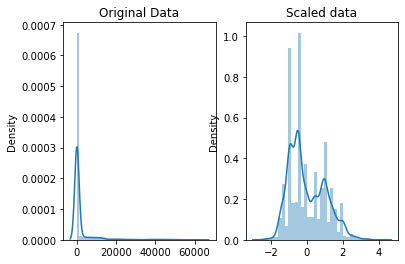

In [8]:

fig, ax=plt.subplots(1,2)
sns.distplot(train_or, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(train, ax=ax[1])
ax[1].set_title("Scaled data")

In [9]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.445241,-1.001668,-0.500641,-0.896894,2.005856,1.340523,0.306786
1,-1.515316,0.997226,0.474070,-0.054300,-0.497986,0.436800,-0.945475
2,-0.814574,0.997226,0.346212,1.630886,-0.497986,0.436800,-0.720463
3,-0.464203,0.997226,-1.363269,-0.896894,-0.497986,-0.466924,0.728042
4,-0.534277,0.997226,-0.337913,-0.896894,-0.497986,-0.466924,-0.768590


In [10]:
test.head()

,age,sex,bmi,children,smoker,region,charges
900,0.785386,0.971857,-1.225667,-0.931972,-0.525676,-1.372657,-0.394519
901,1.596531,0.971857,1.730338,-0.931972,1.897968,0.440989,2.901729
902,-0.910644,0.971857,-0.462775,1.483434,-0.525676,-1.372657,-0.726543
903,0.785386,0.971857,1.076660,-0.931972,-0.525676,0.440989,-0.440938
904,1.596531,-1.026609,0.795595,-0.931972,-0.525676,1.347813,-0.068418


In [11]:
train.insert(0, 'ones', 1)
train.head()

,ones,age,sex,bmi,children,smoker,region,charges
0,1,-1.445241,-1.001668,-0.500641,-0.896894,2.005856,1.340523,0.306786
1,1,-1.515316,0.997226,0.474070,-0.054300,-0.497986,0.436800,-0.945475
2,1,-0.814574,0.997226,0.346212,1.630886,-0.497986,0.436800,-0.720463
3,1,-0.464203,0.997226,-1.363269,-0.896894,-0.497986,-0.466924,0.728042
4,1,-0.534277,0.997226,-0.337913,-0.896894,-0.497986,-0.466924,-0.768590


In [12]:
test.insert(0, 'ones', 1)
test.head()

,ones,age,sex,bmi,children,smoker,region,charges
900,1,0.785386,0.971857,-1.225667,-0.931972,-0.525676,-1.372657,-0.394519
901,1,1.596531,0.971857,1.730338,-0.931972,1.897968,0.440989,2.901729
902,1,-0.910644,0.971857,-0.462775,1.483434,-0.525676,-1.372657,-0.726543
903,1,0.785386,0.971857,1.076660,-0.931972,-0.525676,0.440989,-0.440938
904,1,1.596531,-1.026609,0.795595,-0.931972,-0.525676,1.347813,-0.068418


In [13]:
X = train.iloc[:,:-1]
Y = train['charges']

In [14]:
X_test_df = test.iloc[:,:-1]
Y_test_df = test['charges']

In [15]:
X_test = np.matrix(X_test_df)

In [16]:
X = np.matrix(X)
Y = np.matrix(Y).T
theta = np.matrix(np.zeros((1,7)))

In [17]:
def computeCost(x,y,theta):
    z = np.power(((x * theta.T)-y),2)
    return np.sum(z) / len(x)

In [18]:
print(computeCost(X,Y,theta))

0.9988888888888895


In [19]:
def gradientDescent(X, y, theta, alpha=0.01, iters=100):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [20]:
alpha=0.01
iters=500
g , cost = gradientDescent(X,Y, theta, alpha, iters)

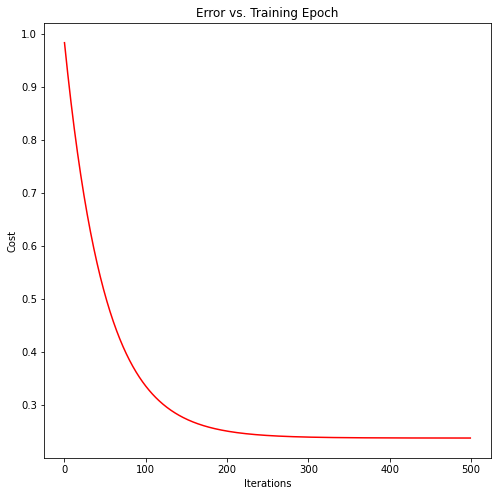

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [22]:
#h = float(g[:,0]) + float(g[:,1]) * X_test[:,1] + float(g[:,2]) * X_test[:,2] + float(g[:,3]) * X_test[:,3] + float(g[:,4]) * X_test[:,4] + float(g[:,5]) * X_test[:,5] + float(g[:,6]) * X_test[:,6]

In [23]:
h = np.matrix(np.zeros((X_test.shape[0],1)))
for i in range(7):
    h += float(g[:,i]) * X_test[:,i]

In [24]:
h = np.array(h)
h = pd.DataFrame(h, columns=['Predict'])

In [25]:
h

,Predict
0,-0.397170
1,2.198114
2,-0.684023
3,-0.066377
4,0.142467
...,...
433,-0.077992
434,-0.793734
435,-0.716872
436,-0.976576


In [26]:
from sklearn.metrics import r2_score
score=r2_score(Y_test_df,h)
print('acurracy : ', round((score*100),2),'%')

acurracy :  72.76 %


In [27]:
X = train.iloc[:,:-1]
Y = train['charges']
X_test_df = test.iloc[:,:-1]
Y_test_df = test['charges']

In [28]:
X = np.array(X)
X_test_df = np.array(X_test_df)
Y = np.array(Y).reshape(-1,1)
Y_test_df = np.array(Y_test_df).reshape(-1,1)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [30]:
theta0 = model.intercept_
theta1 = model.coef_

In [31]:
Y_pred = model.predict(X_test_df)

In [32]:
score=r2_score(Y_test_df,Y_pred)
print('acurracy : ', round((score*100),2),'%')

acurracy :  72.75 %


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
print('MAE : ', mean_absolute_error(Y_test_df,Y_pred), '\n', 'MSE : ', mean_squared_error(Y_test_df,Y_pred) )

MAE :  0.3696264697260671 
 MSE :  0.271925405707037


In [35]:
def Mean_square_error(Y_TRUE,Y_PRED):
    m = Y_TRUE.shape[0]
    z = np.power((Y_PRED- Y_TRUE),2)
    return np.sum(z) / m
def W_mean_square_error(Y_TRUE,Y_PRED):
    m = Y_TRUE.shape[0]
    z = np.power((Y_PRED- Y_TRUE),2)
    return np.sum(z) / (2*m)

In [36]:
print('MSE : ', Mean_square_error(Y_test_df,Y_pred), '\n', 'WMSE : ', W_mean_square_error(Y_test_df,Y_pred) )

MSE :  0.271925405707037 
 WMSE :  0.1359627028535185
